In [274]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [280]:
#open an image
color_img = cv2.imread( "Input/3.jpg" )
img_org = cv2.imread( "Input/3.jpg" , cv2.IMREAD_GRAYSCALE)
_ , th1 = cv2.threshold(img_org , 150 , 255 , cv2.THRESH_BINARY)

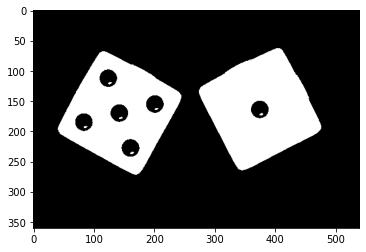

In [281]:
plt.imshow(th1, cmap = "gray")

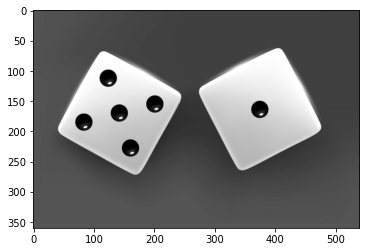

In [282]:
#find dices and split them from img and append to the list
th1 = 255 - th1
contours , _ = cv2.findContours(th1, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
counter = 0
dice_list = []

for c in contours:
    if len(c) > 250:
        x, y, w, h = cv2.boundingRect(c)
        dice = img_org[y:y+h,x:x+w]
        dice_list.append(dice)
        cv2.rectangle(color_img, (x,y) , (x+w,y+h), (255,0,0), 4)
        counter +=1   
        
plt.imshow(img_org, cmap = "gray")

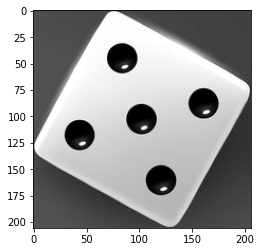

In [283]:
#count each dice numbers
dice1_dots = cv2.HoughCircles(dice_list[1], cv2.HOUGH_GRADIENT,1,50,param1=100, param2=30,minRadius=0, maxRadius=0)
dice1_dots = np.uint16(np.around(dice1_dots))
cv2.putText(color_img, text= f'Dice 1 value is : {len(dice1_dots[0, :])}', org=(20, 25), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=0.75, color=(0, 255, 0),thickness=2)

dice2_dots = cv2.HoughCircles(dice_list[0], cv2.HOUGH_GRADIENT,1,50,param1=100, param2=30,minRadius=0, maxRadius=0)
dice2_dots = np.uint16(np.around(dice2_dots))
cv2.putText(color_img, text= f'Dice 2 value is : {len(dice2_dots[0, :])}', org=(20, 50), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=0.75, color=(0, 255, 0),thickness=2)

plt.imshow(dice_list[0], cmap = "gray")

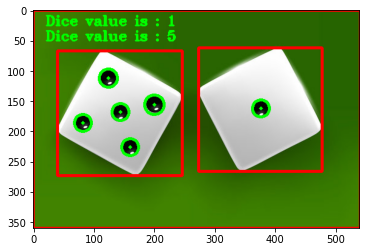

In [284]:
# show circles on img
img = cv2.imread( "Input/3.jpg")
gray_img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
gray_img = cv2.GaussianBlur(gray_img, (3, 3), 0)
lap = cv2.Laplacian(gray_img ,cv2.CV_16S)
lap = np.uint8(np.absolute(lap))

_ , th1 = cv2.threshold(lap , 20 , 255 , cv2.THRESH_BINARY)

th1 = cv2.medianBlur(th1, 5)

circles = cv2.HoughCircles(th1, cv2.HOUGH_GRADIENT, 1,50,param1=100, param2=30,minRadius=0, maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0, :]:
    center = (i[0], i[1])
    # circle center
    cv2.circle(color_img, center,1, (0,255,0), 3)
    # circle outline
    radius = i[2]
    cv2.circle(color_img, center, radius, (0,255,0), 3)

plt.imshow(color_img, cmap = "gray")